In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sqlite3

In [143]:
# import data from sqlite3 database

con = sqlite3.connect('./../../Database.db')
tables = pd.read_sql_query("SELECT * FROM sqlite_master", con)
tables

,type,name,tbl_name,rootpage,sql
0,table,Electric_cars,Electric_cars,2,"CREATE TABLE ""Electric_cars""(\n""profile_id"" TE..."
1,table,Fraud_detection,Fraud_detection,27532,"CREATE TABLE ""Fraud_detection""(\n""step"" TEXT, ..."
2,table,Heart_disease,Heart_disease,160086,"CREATE TABLE ""Heart_disease""(\n""HeartDisease"" ..."
3,table,Insurance_Prediction,Insurance_Prediction,166685,"CREATE TABLE ""Insurance_Prediction""(\n""age"" TE..."
4,table,New_Delhi_Reviews,New_Delhi_Reviews,193805,"CREATE TABLE ""New_Delhi_Reviews""(\n""rating_rev..."


In [167]:
df = pd.read_sql_query("SELECT * FROM Electric_cars", con)
df.head()

,profile_id,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,pm
0,17,-0.450681508,18.80517197,-0.350054592,0.002865568,0.004419137,0.000328102,19.85069084,24.55421448
1,17,-0.325737,18.81857109,-0.305803001,0.000256782,0.000605872,-0.000785353,19.85067177,24.53807831
2,17,-0.440864027,18.82876968,-0.372502625,0.002354971,0.001289587,0.000386468,19.85065651,24.54469299
3,17,-0.327025682,18.83556747,-0.316198707,0.006104666,2.56E-05,0.002045661,19.85064697,24.55401802
4,17,-0.47115013,18.85703278,-0.332272142,0.003132823,-0.064316779,0.037183776,19.85063934,24.56539726


In [168]:
# df = df.drop('profile_id', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   profile_id   1048575 non-null  object
 1   u_q          1048575 non-null  object
 2   coolant      1048575 non-null  object
 3   u_d          1048575 non-null  object
 4   motor_speed  1048575 non-null  object
 5   i_d          1048575 non-null  object
 6   i_q          1048575 non-null  object
 7   ambient      1048575 non-null  object
 8   pm           1048575 non-null  object
dtypes: object(9)
memory usage: 72.0+ MB


In [169]:
#converting object type columns in to numeric.
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

In [170]:
df.isna().sum()

profile_id     24089
u_q                0
coolant            0
u_d            44094
motor_speed    44094
i_d                0
i_q            24089
ambient            0
pm                 0
dtype: int64

In [171]:
df.dropna(subset=['profile_id'],inplace=True)

In [172]:
df.isna().sum()

profile_id         0
u_q                0
coolant            0
u_d            43062
motor_speed    43062
i_d                0
i_q                0
ambient            0
pm                 0
dtype: int64

In [192]:
for id in df['profile_id'].unique():
    mask = (df['profile_id']==id)
    df.loc[mask,'u_d'] = df.loc[mask,'u_d'].mean()

In [195]:
for id in df['profile_id'].unique():
    mask = (df['profile_id']==id)
    df.loc[mask,'motor_speed'] = df.loc[mask,'motor_speed'].mean()

In [188]:
df.loc[mask,'u_d'].mean()

-28.965331853935716

In [196]:
df.isna().sum()

profile_id     0
u_q            0
coolant        0
u_d            0
motor_speed    0
i_d            0
i_q            0
ambient        0
pm             0
dtype: int64

In [194]:
df[df['u_d'].isna()].profile_id.value_counts().sort_index()

Series([], Name: count, dtype: int64)

# analyse the data

In [106]:
df[df['profile_id']==2].describe()

,profile_id,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,pm
count,18096.0,18096.000000,18096.000000,18096.000000,18096.000000,18096.000000,18096.000000,18096.000000,18096.000000
mean,2.0,5.897405,18.541974,-2.822761,100.000187,-48.292223,93.474416,22.170192,32.755297
std,0.0,2.232522,0.328057,5.476182,0.026289,58.774150,117.252072,0.621620,7.547343
min,2.0,3.919605,15.594865,-9.820481,99.422050,-122.974426,-0.003094,19.692505,22.970417
25%,2.0,4.142571,18.353747,-9.799911,99.983768,-122.971855,1.096950,21.936517,25.616047
50%,2.0,4.175349,18.526794,1.468185,99.999447,-2.001384,1.098523,22.303887,31.246891
75%,2.0,8.747560,18.705001,1.496647,100.016306,-2.000432,242.423538,22.511041,39.816584
max,2.0,8.798512,19.774647,1.701082,100.552002,0.001466,242.425613,23.391573,45.985336


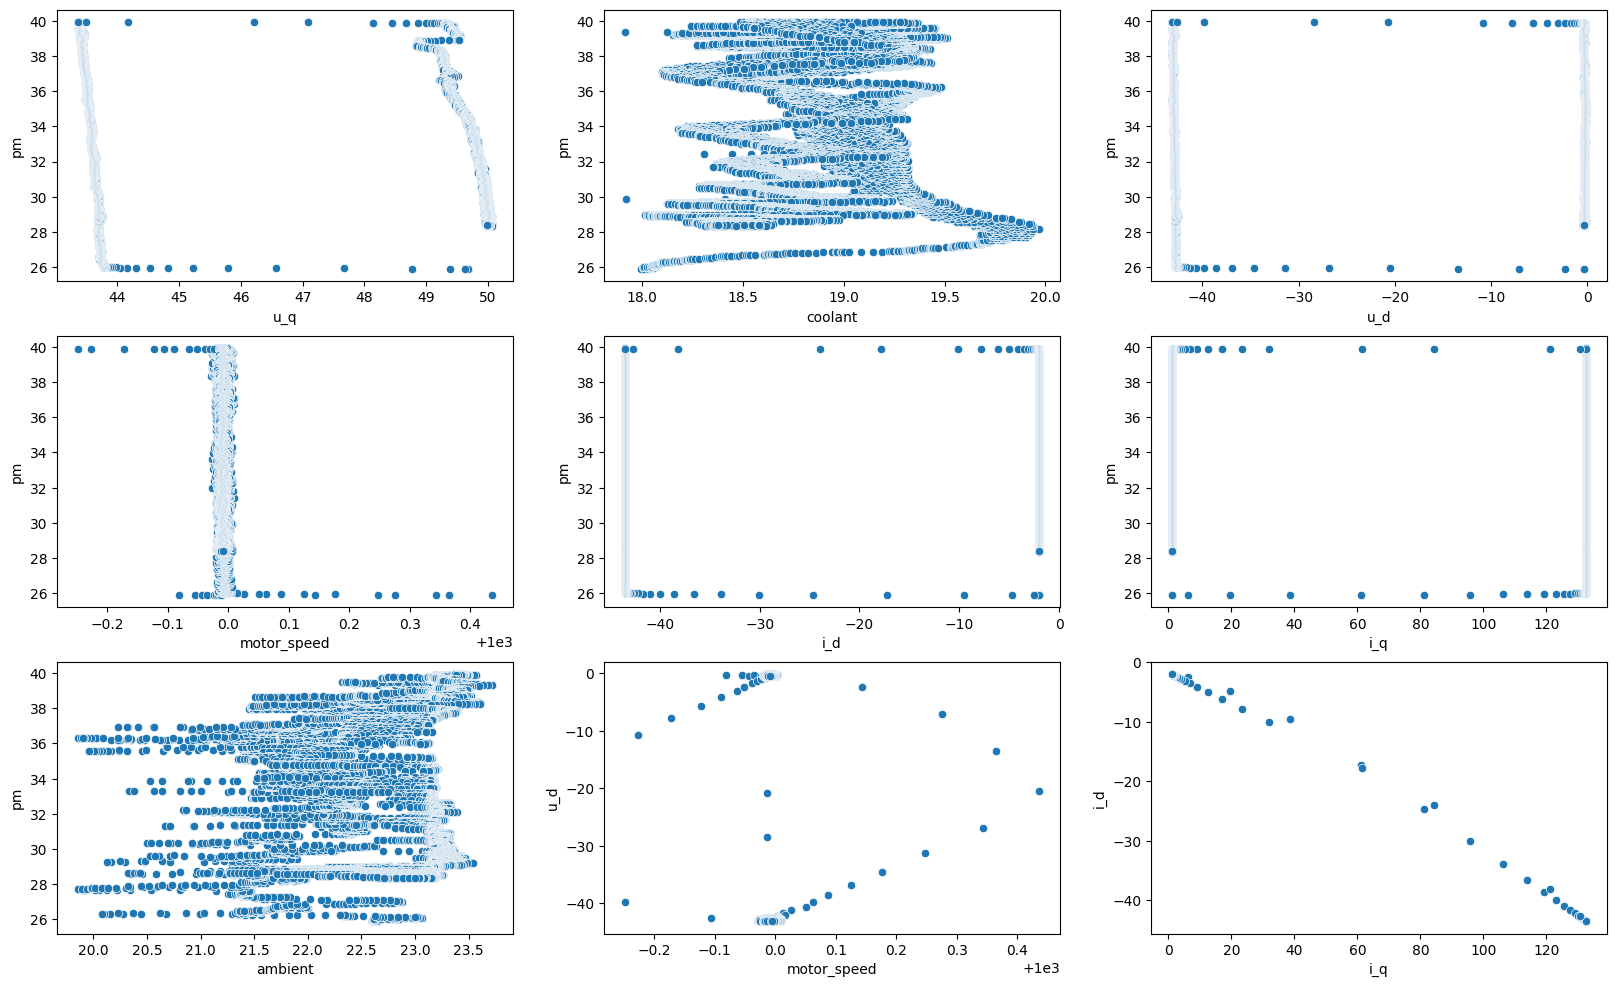

In [141]:
#Visualizing categorical variables
df1 = df[df['profile_id']==5]

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.scatterplot(x = 'u_q', y = 'pm', data = df1)
plt.subplot(3,3,2)
sns.scatterplot(x = 'coolant', y = 'pm', data = df1)
plt.subplot(3,3,3)
sns.scatterplot(x = 'u_d', y = 'pm', data = df1)
plt.subplot(3,3,4)
sns.scatterplot(x = 'motor_speed', y = 'pm', data = df1)
plt.subplot(3,3,5)
sns.scatterplot(x = 'i_d', y = 'pm', data = df1)
plt.subplot(3,3,6)
sns.scatterplot(x = 'i_q', y = 'pm', data = df1)
plt.subplot(3,3,7)
sns.scatterplot(x = 'ambient', y = 'pm', data = df1)
plt.subplot(3,3,8)
sns.scatterplot(x = 'motor_speed', y = 'u_d', data = df1)
plt.subplot(3,3,9)
sns.scatterplot(x = 'i_q', y = 'i_d', data = df1)
plt.show()

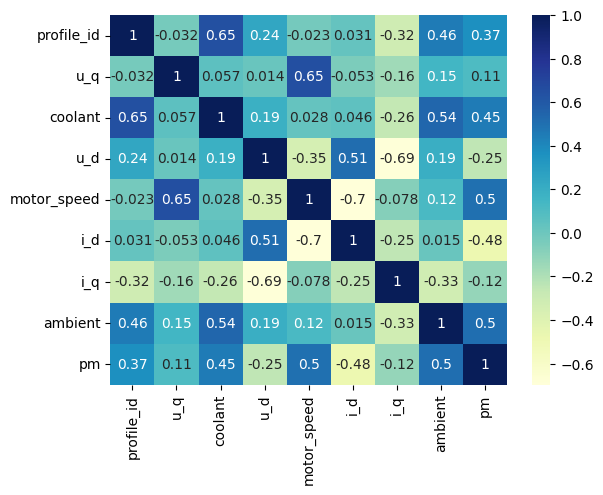

In [77]:
#Correlation of output with numerical variables

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [229]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error ,  mean_absolute_percentage_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [107]:
numerical_features = ['u_q', 'coolant', 'u_d', 'motor_speed', 'i_d', 'i_q', 'ambient', 'pm']
df2=df[numerical_features]

In [202]:
df.head()

,profile_id,u_q,coolant,u_d,motor_speed,i_d,i_q,ambient,pm
0,17.0,-0.450682,18.805172,-54.193727,4989.594829,0.004419,0.000328,19.850691,24.554214
1,17.0,-0.325737,18.818571,-54.193727,4989.594829,0.000606,-0.000785,19.850672,24.538078
2,17.0,-0.440864,18.828770,-54.193727,4989.594829,0.001290,0.000386,19.850657,24.544693
3,17.0,-0.327026,18.835567,-54.193727,4989.594829,0.000026,0.002046,19.850647,24.554018
4,17.0,-0.471150,18.857033,-54.193727,4989.594829,-0.064317,0.037184,19.850639,24.565397


In [203]:
def train_test_split_and_scale(df):
    y = df['pm']
    x = df.drop('pm',axis=1)
    features = list(x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test, y_train, y_test,features, scaler

In [205]:
x_train, x_test, y_train, y_test,features, scaler= train_test_split_and_scale(df)


In [207]:
rmse_val = [] #to store rmse values for different k
k_val = []
r_squared_score = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_test_pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_test_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2_val = r2_score(y_test, y_test_pred)
    r_squared_score.append(r2_val)
    k_val.append(K)
    print('RMSE value for k= ' , K , 'is:', error)
    print("R-squared score: ", r2_val)

RMSE value for k=  1 is: 2.2326958309038853
R-squared score:  0.9875646224181974
RMSE value for k=  2 is: 2.045883493995135
R-squared score:  0.989558529863907
RMSE value for k=  3 is: 2.0182157126062186
R-squared score:  0.9898390334965574
RMSE value for k=  4 is: 2.0401604653451173
R-squared score:  0.9896168648110025
RMSE value for k=  5 is: 2.06646231620327
R-squared score:  0.9893474192851281
RMSE value for k=  6 is: 2.1078835049968734
R-squared score:  0.9889160881207135
RMSE value for k=  7 is: 2.150945901209662
R-squared score:  0.988458591078845
RMSE value for k=  8 is: 2.193011877745354
R-squared score:  0.988002746888258
RMSE value for k=  9 is: 2.2358311261834944
R-squared score:  0.9875296727799795
RMSE value for k=  10 is: 2.2777242877165453
R-squared score:  0.987057977241249


In [139]:
rmse_val = [] #to store rmse values for different k
k_val = []
r_squared_score = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_test_pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_test_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2_val = r2_score(y_test, y_test_pred)
    r_squared_score.append(r2_val)
    k_val.append(K)
    print('RMSE value for k= ' , K , 'is:', error)
    print("R-squared score: ", r2_val)

RMSE value for k=  1 is: 2.304825269322588
R-squared score:  0.9866990673175301
RMSE value for k=  2 is: 2.1650497791346575
R-squared score:  0.9882634121391827
RMSE value for k=  3 is: 2.169376672737435
R-squared score:  0.9882164536694134
RMSE value for k=  4 is: 2.2157999571304337
R-squared score:  0.9877067367661719
RMSE value for k=  5 is: 2.281313982893807
R-squared score:  0.9869690461480067
RMSE value for k=  6 is: 2.350783507724075
R-squared score:  0.9861633373581989
RMSE value for k=  7 is: 2.410723323867125
R-squared score:  0.9854487326056616
RMSE value for k=  8 is: 2.4694666693911134
R-squared score:  0.9847309358539701
RMSE value for k=  9 is: 2.5260440293599626
R-squared score:  0.9840232693269114
RMSE value for k=  10 is: 2.578622776579569
R-squared score:  0.9833512469785911
RMSE value for k=  11 is: 2.6274879189772897
R-squared score:  0.9827142774621399
RMSE value for k=  12 is: 2.6755356894883233
R-squared score:  0.982076303604327
RMSE value for k=  13 is: 2.7233

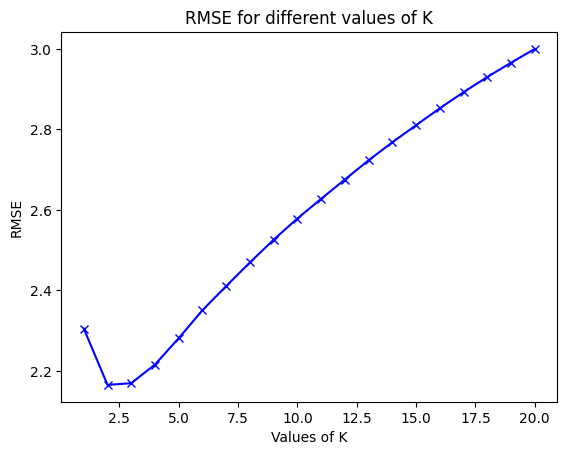

In [140]:
import matplotlib.pyplot as plt

plt.plot(k_val, rmse_val, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('RMSE')
plt.title('RMSE for different values of K')
plt.show()

# XGBOOST

In [208]:
def train_test_split_and_scale(df):
    y = df['pm']
    x = df.drop('pm',axis=1)
    features = list(x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    # scaler = MinMaxScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)
    return x_train, x_test, y_train, y_test,features #, scaler

In [209]:
x_train, x_test, y_train, y_test,features = train_test_split_and_scale(df)


In [217]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test,xgb):
    xgb.fit(x_train, y_train)
    xgb_predict = xgb.predict(x_test)
    error = sqrt(mean_squared_error(y_test,xgb_predict)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r2_val = r2_score(y_test, xgb_predict)
    r_squared_score.append(r2_val)
    k_val.append(K)
    # print('RMSE value for k= ' , K , 'is:', error)
    print("R-squared score: ", r2_val)
    # return xgb

In [218]:
from xgboost import XGBRegressor

In [233]:

xgb =  XGBRegressor(random_state=0,device = 'gpu:0')
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test,xgb)

R-squared score:  0.9747744211929845


In [220]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : Optional[int]
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          d

In [221]:
param_grid = [{'learning_rate': [0.1, 0.3, 0.5, 0.7],
               'max_depth': [3,6,10],
               'subsample': [0.8, 1],
               'colsample_bytree': [0.8, 1],
               'n_estimators' : [50, 100, 150]}
             ]

In [234]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor(random_state=0, device = 'gpu:0')
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, refit=True, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.803 total time=   0.4s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.806 total time=   0.3s
[CV 3/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.806 total time=   0.4s
[CV 4/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.801 total time=   0.4s
[CV 5/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8;, score=0.802 total time=   0.4s
[CV 1/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1;, score=0.802 total time=   0.3s
[CV 2/5] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1;, score=0.806 total time=   0.4s
[CV 3/5] END colsample_b

KeyboardInterrupt: 

In [223]:
search.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.3,
 'max_depth': 10,
 'n_estimators': 150,
 'subsample': 1}

In [230]:
xgb = search.best_estimator_
# this is just to show the possibility
# but it is recommended to train the model on complete training dataset again
xgb_predict = xgb.predict(x_test)
error = sqrt(mean_squared_error(y_test,xgb_predict)) #calculate rmse
rmse_val.append(error) #store rmse values
r2_val = r2_score(y_test, xgb_predict)
r_squared_score.append(r2_val)
k_val.append(K)
print('RMSE value is:', error)
print("R-squared score: ", r2_val)

error1 = sqrt(mean_absolute_percentage_error(y_test,xgb_predict)) #calculate rmse
print('MAPE value is:', error1)

error2 = sqrt(mean_absolute_error(y_test,xgb_predict)) #calculate rmse
print('MAE value is:', error2)
# return xgb

RMSE value is: 1.8589052901408807
R-squared score:  0.9913798587873962
MAPE value is: 0.15353933485153934
MAE value is: 1.0670662808542504
